# GRIP: The Spark Foundation 

### Data Science and Business Analytics Intern - November 2022

### Author: Shreyansha Tai Sonwane

## TASK 3: Exploratory Data Analysis - Retail

### Problem Statement:

Perform Exploratory Data Analysis on dataset “sample superstore”. As a Business Manager try to find out the weak areas where you can work to make more profit.

# importing the libraries and main data set


In [41]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
superstore_data=pd.read_csv('SampleSuperstore.csv')

# inspection of data frame

In [44]:
superstore_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


checking shape of data(row and column)

In [45]:
superstore_data.shape

(9994, 13)

there are 9994 rows and 13 columns

checking columns present

In [46]:
superstore_data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

data types of each column

In [47]:
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


so there is no need to transform any data

null value check for each column

In [48]:
superstore_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

there is no null value in any column

lets check for any unusual data in any continuous column

In [49]:
superstore_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


so no issues in continuous columns

lets check for any unusual data in any categorical column

In [50]:
superstore_data['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [51]:
superstore_data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [52]:
superstore_data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [53]:
superstore_data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [54]:
superstore_data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [55]:
superstore_data['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [56]:
superstore_data['Country'].unique()

array(['United States'], dtype=object)

In [57]:
superstore_data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

conclusion-no unusual entry in any categorical column

# analysis

In [58]:
superstore_data.groupby(by='Segment').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


insight-consumer segment had most profit to try to increase its sales

In [59]:
superstore_data.groupby(by='Region').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,151786150,501239.8908,8780,558.34,39706.3625
East,50171698,678781.2400,10618,414.00,91522.7800
South,55875052,391721.9050,6209,238.55,46749.4303
West,293739752,725457.8245,12266,350.20,108418.4489


Insight: West region had most profit so try to advertise there to further increase sale. We should also focus on least performing Central Region.

lets create dataframe where profit is less than zero(i.e loss) to find insights of loss contributing factors

In [60]:
loss_data=superstore_data[superstore_data.Profit<0]

In [61]:
loss_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


now lets check under each categories like category,sub-category,segment what inspire loss

In [62]:
loss_data.groupby(by='Category').mean()

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,59700.907563,361.184295,3.714286,0.367143,-85.344690
Office Supplies,54746.056433,103.395796,3.865688,0.617607,-63.899840
Technology,50287.590406,439.899974,3.553506,0.333579,-142.361322


insight-more loss in technology category and least loss in office supplies

In [63]:
loss_data.groupby(by='Sub-Category').sum()


,Postal Code,Sales,Quantity,Discount,Profit
Sub-Category,,,,,
Accessories,5286382,10958.8000,330,18.20,-930.6265
Appliances,4825871,3382.5340,235,53.60,-8629.6412
Binders,32609300,36140.6130,2456,452.40,-38510.4964
Bookcases,6423506,48072.7408,422,37.99,-12152.2060
Chairs,15008025,91988.4560,876,61.40,-9880.8413
Fasteners,701930,149.2800,55,2.40,-33.1952
Furnishings,10970913,12845.8440,597,88.60,-6490.9134
Machines,2236261,72456.2530,157,25.60,-30118.6682
Phones,6105294,35797.8400,476,46.60,-7530.6235


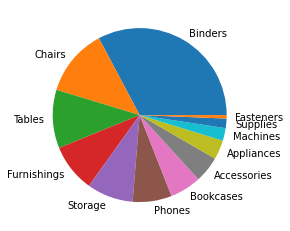

In [64]:
plt.pie(loss_data['Sub-Category'].value_counts(),labels=loss_data['Sub-Category'].value_counts().keys())
plt.show()

Insight: binders had highest share in sale,discount and loss. so just reduce the discounts.it may reduce sale a bit but will reduce loss and increase net revenue

In [65]:
loss_data.groupby(by='Segment').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,57202260,247196.2460,3651,476.76,-84945.7112
Corporate,30034273,131860.5383,2191,272.00,-44787.2076
Home Office,17522858,89650.3705,1198,150.98,-26398.3669


Insight: In consumer segment there is most loss and even highest discount so reduce discount there.
so in consumer segment we have to increase sales by reducing discount

In [66]:
loss_data.groupby(by='City').sum().sort_values('Profit').head(10)

,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,
Philadelphia,4783713,70460.5510,892,115.30,-19590.7411
Houston,14256474,37640.7304,683,104.14,-14785.3668
Chicago,9397492,19910.0120,541,88.20,-11120.6271
San Antonio,2580831,17395.1450,139,17.10,-7831.0254
Lancaster,683904,7699.2420,71,9.40,-7632.4946
Burlington,108868,12044.8740,19,2.00,-5999.3318
Dallas,5487794,9994.0562,280,39.30,-4208.5218
Jacksonville,1237176,31146.2710,154,18.85,-4059.9857
New York City,400828,19533.8020,132,12.20,-3966.0226


philadelphia is highest loss making city, followed by houston,chicago and so on.in above cities we need to cut discount for high sale cities and for rest advertise better

In [67]:
loss_data.groupby(by='City').sum().sort_values('Sales').head(10)

,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,
Abilene,79605,1.392,2,0.8,-3.7584
Elyria,44035,1.824,1,0.7,-1.3984
Edinburg,78539,2.068,1,0.8,-3.4122
Pensacola,32503,2.214,3,0.7,-1.4760
Port Saint Lucie,34952,2.694,2,0.7,-2.2450
Ormond Beach,32174,2.808,3,0.7,-1.9656
Homestead,33030,2.944,1,0.2,-0.6624
Thomasville,27360,3.204,2,0.7,-2.4564
Grove City,43123,3.648,2,0.7,-2.7968


some cities had very very less sale,focus on big ad campaign there

# check the imbalance percentage of target variable

In [68]:
loss_data.Profit.count()/superstore_data.Profit.count()*100

18.721232739643785

so only 18.72% of total population is loss making.


# comparing the attribute of profit making and loss making through some plots

Text(0, 0.5, 'Sales')

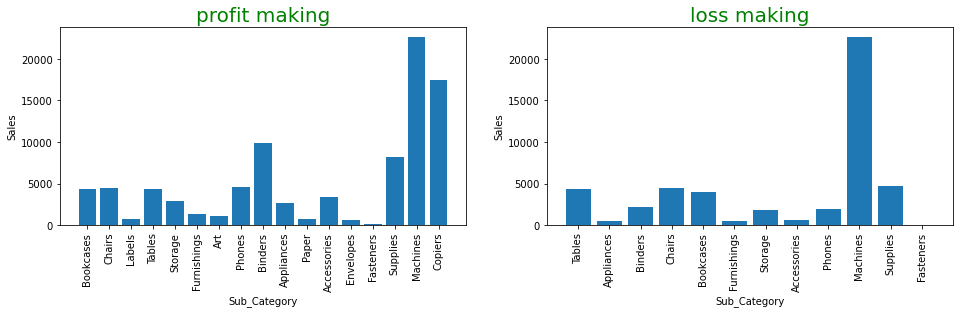

In [69]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.bar(superstore_data['Sub-Category'],superstore_data.Sales)
plt.title("profit making", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.xlabel('Sub_Category');
plt.ylabel('Sales')
plt.subplot(2,2,2)
plt.bar(loss_data['Sub-Category'],loss_data.Sales)
plt.title("loss making", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.xlabel('Sub_Category');
plt.ylabel('Sales')


Text(0, 0.5, 'Discount')

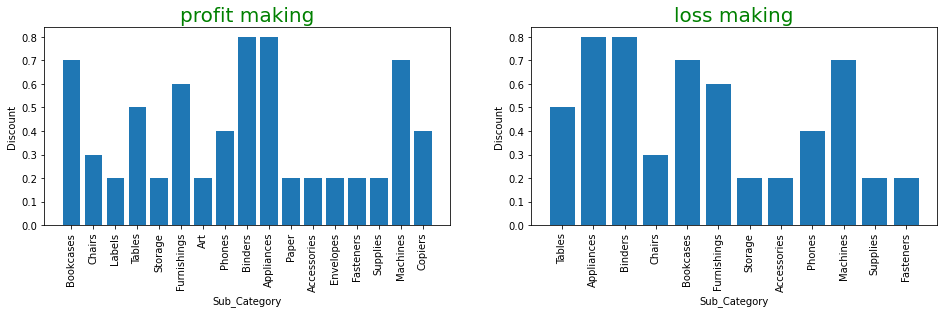

In [70]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.bar(superstore_data['Sub-Category'],superstore_data.Discount)
plt.title("profit making", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.xlabel('Sub_Category');
plt.ylabel('Discount')
plt.subplot(2,2,2)
plt.bar(loss_data['Sub-Category'],loss_data.Discount)
plt.title("loss making", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.xlabel('Sub_Category');
plt.ylabel('Discount')


Text(0, 0.5, 'Sales')

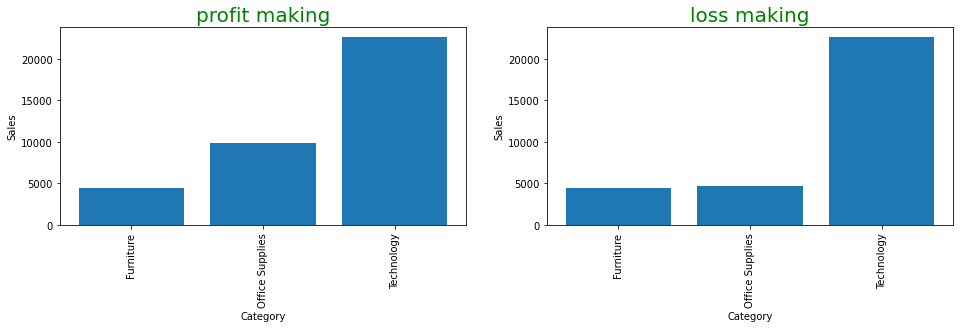

In [71]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.bar(superstore_data['Category'],superstore_data.Sales)
plt.title("profit making", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.xlabel('Category');
plt.ylabel('Sales')
plt.subplot(2,2,2)
plt.bar(loss_data['Category'],loss_data.Sales)
plt.title("loss making", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.xlabel('Category');
plt.ylabel('Sales')


Text(0, 0.5, 'Discount')

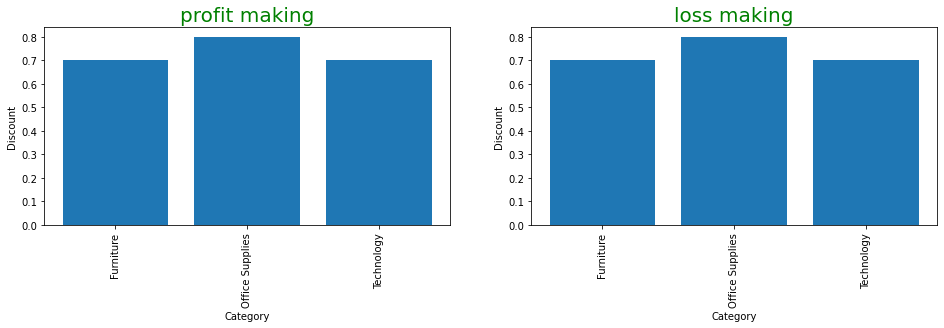

In [72]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.bar(superstore_data['Category'],superstore_data.Discount)
plt.title("profit making", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.xlabel('Category');
plt.ylabel('Discount')
plt.subplot(2,2,2)
plt.bar(loss_data['Category'],loss_data.Discount)
plt.title("loss making", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.xlabel('Category');
plt.ylabel('Discount')

Text(0, 0.5, 'Sales')

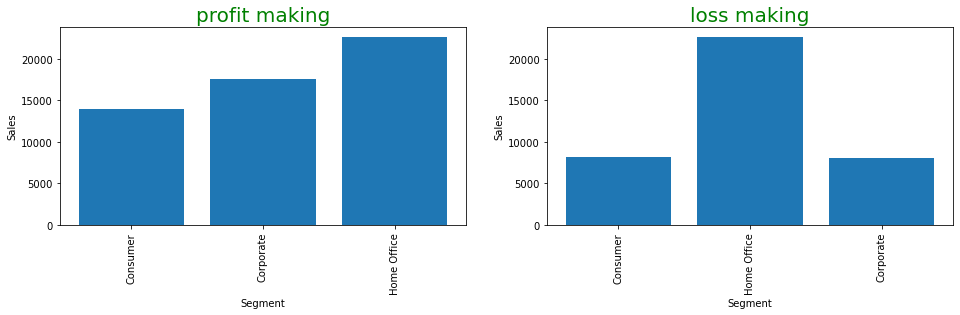

In [73]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.bar(superstore_data['Segment'],superstore_data.Sales)
plt.title("profit making", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.xlabel('Segment');
plt.ylabel('Sales')
plt.subplot(2,2,2)
plt.bar(loss_data['Segment'],loss_data.Sales)
plt.title("loss making", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.xlabel('Segment');
plt.ylabel('Sales')


Text(0, 0.5, 'Discount')

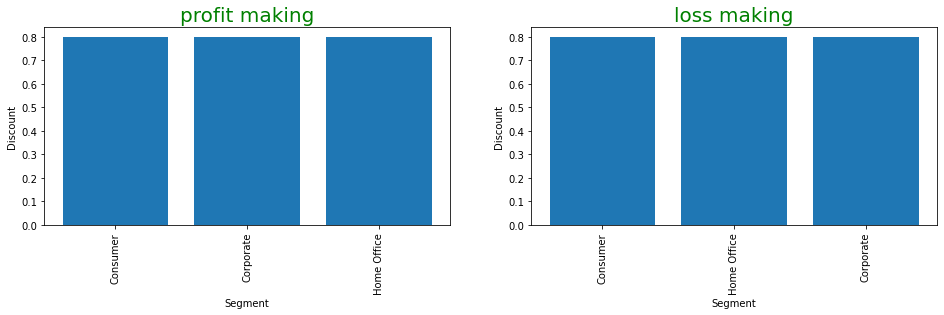

In [74]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.bar(superstore_data['Segment'],superstore_data.Discount)
plt.title("profit making", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.xlabel('Segment');
plt.ylabel('Discount')
plt.subplot(2,2,2)
plt.bar(loss_data['Segment'],loss_data.Discount)
plt.title("loss making", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.xlabel('Segment');
plt.ylabel('Discount')

Text(0, 0.5, 'Sales')

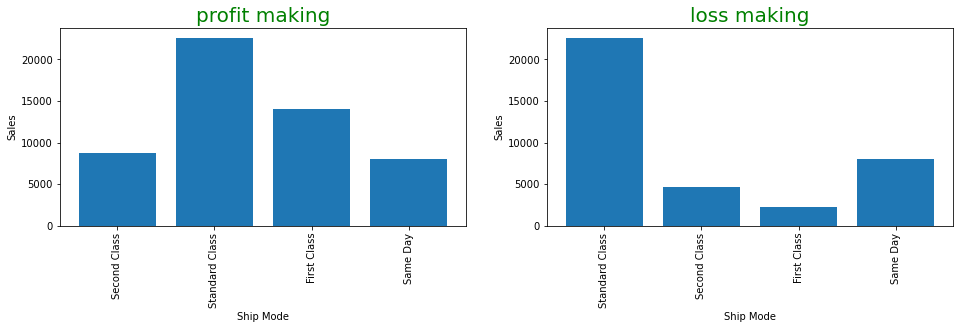

In [75]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.bar(superstore_data['Ship Mode'],superstore_data.Sales)
plt.title("profit making", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.xlabel('Ship Mode');
plt.ylabel('Sales')
plt.subplot(2,2,2)
plt.bar(loss_data['Ship Mode'],loss_data.Sales)
plt.title("loss making", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.xlabel('Ship Mode');
plt.ylabel('Sales')

Text(0, 0.5, 'Discount')

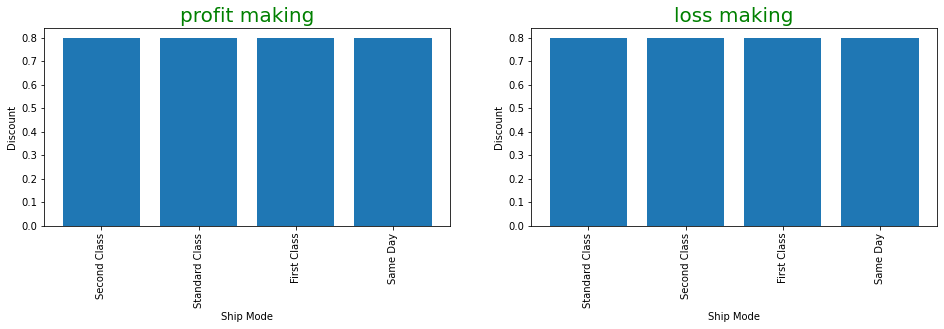

In [76]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.bar(superstore_data['Ship Mode'],superstore_data.Discount)
plt.title("profit making", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.xlabel('Ship Mode');
plt.ylabel('Discount')
plt.subplot(2,2,2)
plt.bar(loss_data['Ship Mode'],loss_data.Discount)
plt.title("loss making", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.xlabel('Ship Mode');
plt.ylabel('Discount')

## Insights

- technology is highest in sale and also highly profit making.so you can cut discount to further increase sale.
- furniture is least in sale so increase discount here,do some advertisements
- machine subcategory is giving quite high loss and very less profit and its sale is highest and discount is quite high. directly cut its discount as we can't compromise with sales.
- corporate segment is making more profit and less loss
- first class shipping giving more profit and less loss


<AxesSubplot:>

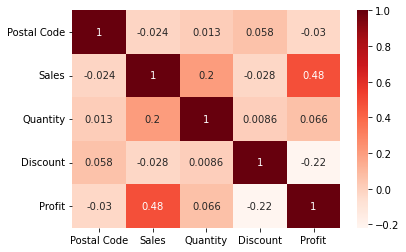

In [77]:
sns.heatmap(superstore_data.corr(),annot=True,cmap='Reds')

so among all correlations,sales and profit had highest correlation

discount and profit had neagative correlations

rest correlations are almost negative

# Thank You